<center>
    <h1> ILI285 - Computación Científica I  / INF285 - Computación Científica </h1>
    <h2> Newton's Method in $\mathbb{R}^n$ </h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.01</h2>
</center>

## Table of Contents
* [Newton's method](#newton)
* [Python Modules and Functions](#py)
* [Acknowledgements](#acknowledgements)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact

<div id='newton' />

# Newton's method

In [2]:
f1= lambda x,y: x**2+y**2-1 
f2= lambda x,y: y-x**2
J = lambda x,y: np.array([[2*x, 2*y],[-2*x, 1]])

In [3]:
Newton = lambda x,y: np.array([[x],[y]])-np.linalg.solve(J(x,y),np.array([[f1(x,y)],[f2(x,y)]]))

In [4]:
delta = 0.025
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(x, y)
Z1 = f1(X,Y)
Z2 = f2(X,Y)

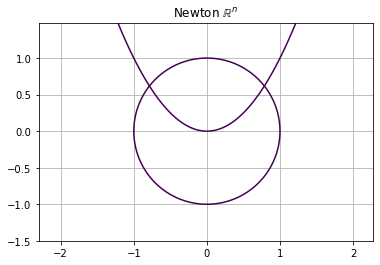

In [5]:
plt.figure()
CS1 = plt.contour(X, Y, Z1,levels=[0])
CS2 = plt.contour(X, Y, Z2,levels=[0])
#plt.clabel(CS1, inline=1, fontsize=10)
#plt.clabel(CS2, inline=1, fontsize=10)
plt.grid()
plt.axis('equal')
plt.title(r'Newton $\mathbb{R}^n$')
plt.show()

In [6]:
def Show_Newton(x0=1.2,y0=0.3,n=0):
    plt.figure()
    CS1 = plt.contour(X, Y, Z1,levels=[0])
    CS2 = plt.contour(X, Y, Z2,levels=[0])
    plt.grid()
    plt.axis('equal')
    plt.title(r'Newton $\mathbb{R}^n$')
    plt.plot(x0,y0,'rx')
    print(x0,y0)
    for i in np.arange(n):
        xout=Newton(x0,y0)
        x1=float(xout[0])
        y1=float(xout[1])
        plt.plot(x1,y1,'rx')
        plt.plot([x0, x1],[y0, y1],'r')
        x0=x1
        y0=y1
        print(x0,y0)
    plt.show()

In [7]:
interact(Show_Newton,x0=(-1.4,1.4,0.1),y0=(-1.4,1.4,0.1), n=(0,100,1))

interactive(children=(FloatSlider(value=1.2, description='x0', max=1.4, min=-1.4), FloatSlider(value=0.3, desc…

<function __main__.Show_Newton(x0=1.2, y0=0.3, n=0)>

<div id='py' />

## Python Modules and Functions

Newton's method: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

Broyden:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.broyden1.html#scipy.optimize.broyden1
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.broyden2.html#scipy.optimize.broyden2

Minimization:

https://docs.scipy.org/doc/scipy/reference/optimize.html

<div id='acknowledgements' />

# Acknowledgements
* _Material created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`). DI UTFSM. April 2018._
* _Update June 2020 - v1.15 - C.Torres_ : Fixing formatting issues.